In [57]:
%load_ext autoreload
%autoreload 2

from hydroml.training.train import train
from hydroml.config.config import Config, load_config
config = Config(target_features=['streamflow_mmd'],
                dynamic_features=['precipitation_AWAP', 'et_morton_wet_SILO'],
                static_features=['catchment_area'],
                evolving_static_features={'dynamic_feature_mean': {'dynamic_features': ['precipitation_AWAP']}}, 
                evolving_metadata={'observed_target_std': {'target_features': ['streamflow_mmd']}}, # can be set automatically
                batch_size=256,
                cal={'periods' : [['2000-01-01', '2017-01-01']], 'catchment_ids':['401009', '410730'], 'weights': [0.15, 0.85]},
                val={'periods' : [['2000-01-01', '2017-01-01']], 'catchment_ids':[ '401009', '410730']}, #,
                dataset_config={'basepath': 'Z://Data//CAMELS_AUS//preprocessed', 'static_feature_path': 'Z://Data//CAMELS_AUS//CAMELS_AUS_Attributes&Indices_MasterTable.csv', 'name':'camels_aus_v1'},
                max_epochs=50,
                lstm_hidden_size = 60
                )

current_path, version = train(config)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


valid data points per catchment {0: 3034, 1: 5114}


GPU available: False, used: False                                      
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\sho108\AppData\Local\pypoetry\Cache\virtualenvs\hydroml-dFLAodHf-py3.11\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:654: Checkpoint directory \\fs1-cbr.nexus.csiro.au\{ev-ca-macq}\work\sho108\hydroml\results\default\241209121101_addd exists and is not empty.

  | Name              | Type       | Params | Mode 
---------------------------------------------------------
0 | static_embedding  | Linear     | 3      | train
1 | dynamic_embedding | Linear     | 5      | train
2 | lstm              | LSTM       | 15.4 K | train
3 | dropout           | Identity   | 0      | train
4 | head              | Sequential | 621    | train
---------------------------------------------------------
16.0 K    Trainable params
0         Non-trainable params
16.0 K    Total params
0.064     Total estimated model params size (MB)
9 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\sho108\AppData\Local\pypoetry\Cache\virtualenvs\hydroml-dFLAodHf-py3.11\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
c:\Users\sho108\AppData\Local\pypoetry\Cache\virtualenvs\hydroml-dFLAodHf-py3.11\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
c:\Users\sho108\AppData\Local\pypoetry\Cache\virtualenvs\hydroml-dFLAodHf-py3.11\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (32) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_step

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [58]:
from hydroml.models.get_model_from_path import get_model_from_path
from hydroml.data.camels_aus_ds import get_dataset
from hydroml.prediction.prediction import process_and_convert_dataloader_to_xarray
from hydroml.evaluation.metrics import get_metrics
from pathlib import Path
from hydroml.config.config import Config, load_config
#version = '241209094143_3fdb'
#current_path = Path('P://work//sho108//hydroml//results//default')
model = get_model_from_path(current_path/version)
config = load_config(current_path/version/'config.yaml')
dataset = get_dataset(config, 'val', is_train=False)
dataloader = dataset.to_dataloader()
# make predictions for all catchments
ds = process_and_convert_dataloader_to_xarray(dataloader, model, config)
metrics = get_metrics(ds)

  

[autoreload of hydroml.models failed: Traceback (most recent call last):
  File "c:\Users\sho108\AppData\Local\pypoetry\Cache\virtualenvs\hydroml-dFLAodHf-py3.11\Lib\site-packages\IPython\extensions\autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\sho108\AppData\Local\pypoetry\Cache\virtualenvs\hydroml-dFLAodHf-py3.11\Lib\site-packages\IPython\extensions\autoreload.py", line 471, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\Program Files\Python311\Lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "\\fs1-cbr.

In [59]:
metrics.to_dataframe()

,,,nse,kge,rmse,bias,relative_bias,absolute_bias,nse_sqrt
catchment_id,lead_time,feature,,,,,,,
401009,0,0,0.462142,0.697217,0.370089,1.103762,0.103762,1.103762,0.663577
410730,0,0,0.960589,0.953696,0.213317,1.041807,0.041807,1.041807,0.938730


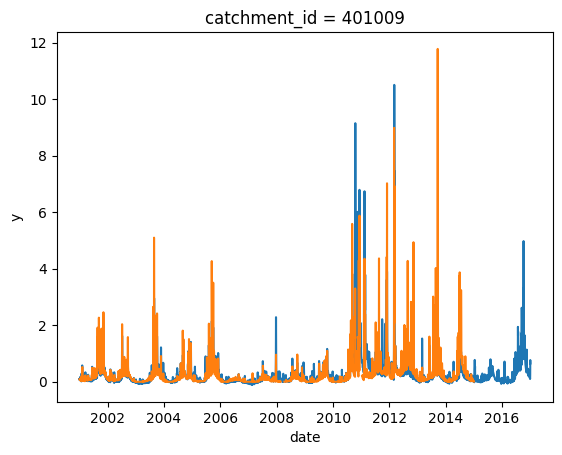

In [60]:
ds.sel(catchment_id='401009').prediction.plot()
ds.sel(catchment_id='401009').y.plot()


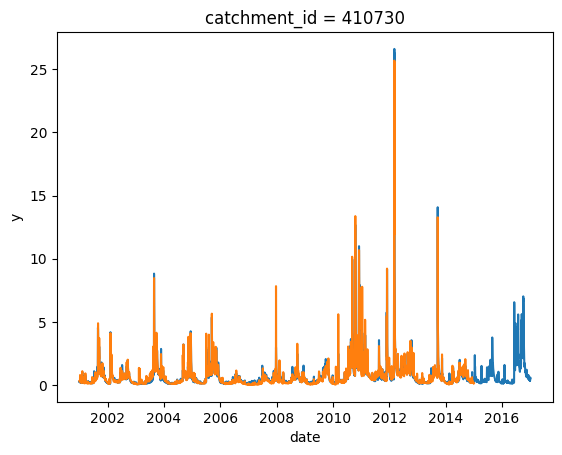

In [61]:
ds.sel(catchment_id='410730').prediction.plot()
ds.sel(catchment_id='410730').y.plot()